In [1]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from tensorflow.keras import datasets, optimizers
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, BatchNormalization
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from keras.utils import to_categorical
from sklearn.model_selection import KFold

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
name_list = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

n_classes = len(name_list)
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


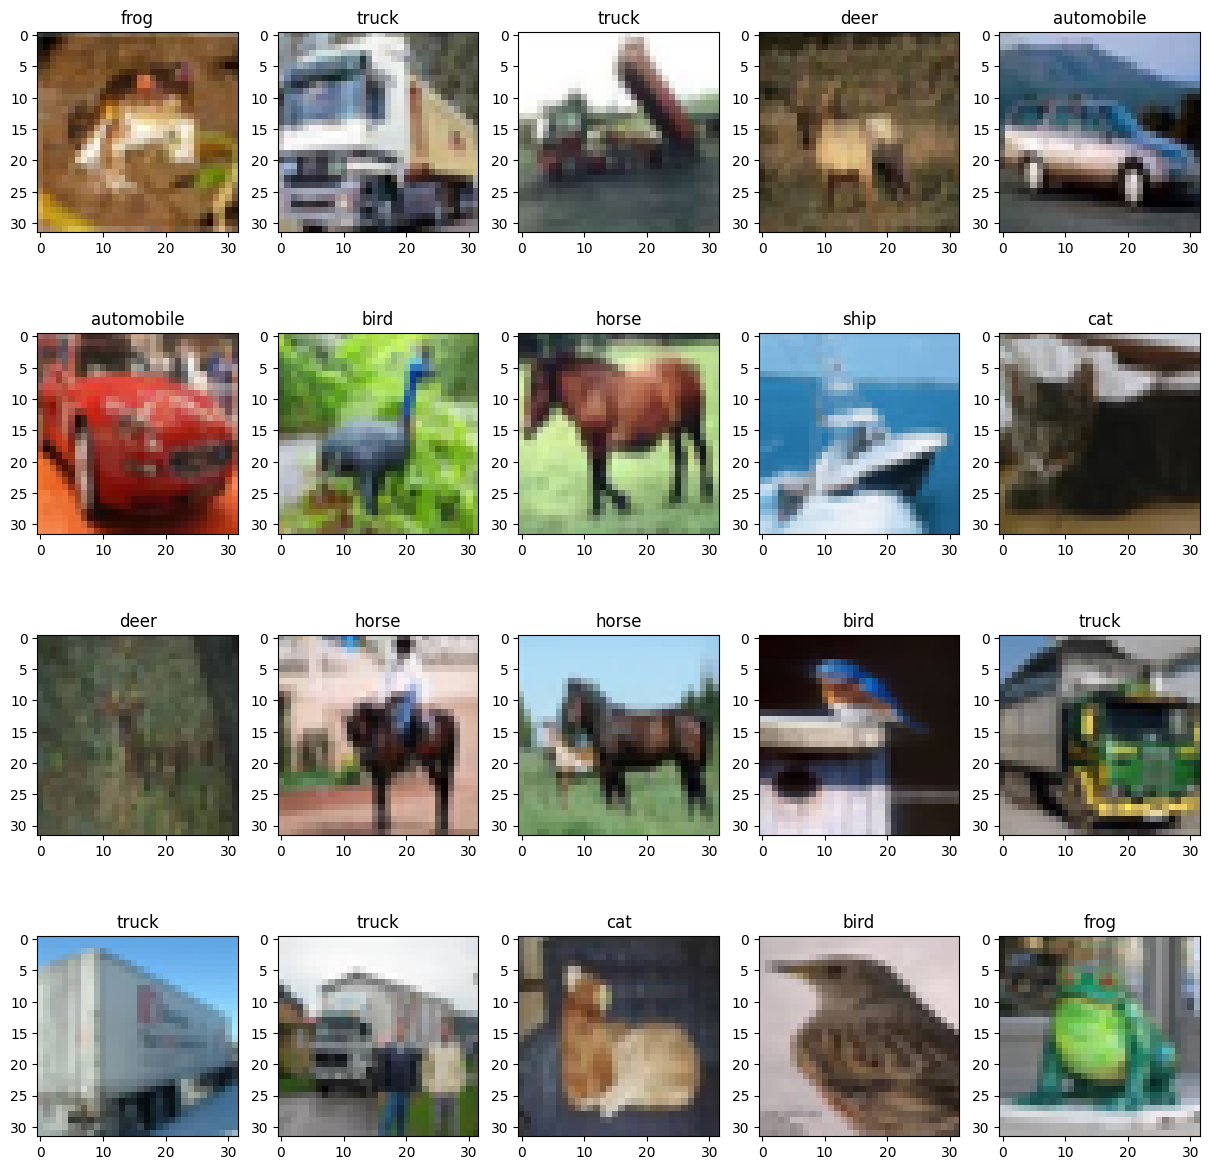

In [ ]:
plt.figure(figsize = (15,15))
for i in range(20):
  plt.subplot(4,5, i+1)
  plt.title(name_list[y_train[i][0]])
  plt.imshow(X_train[i])

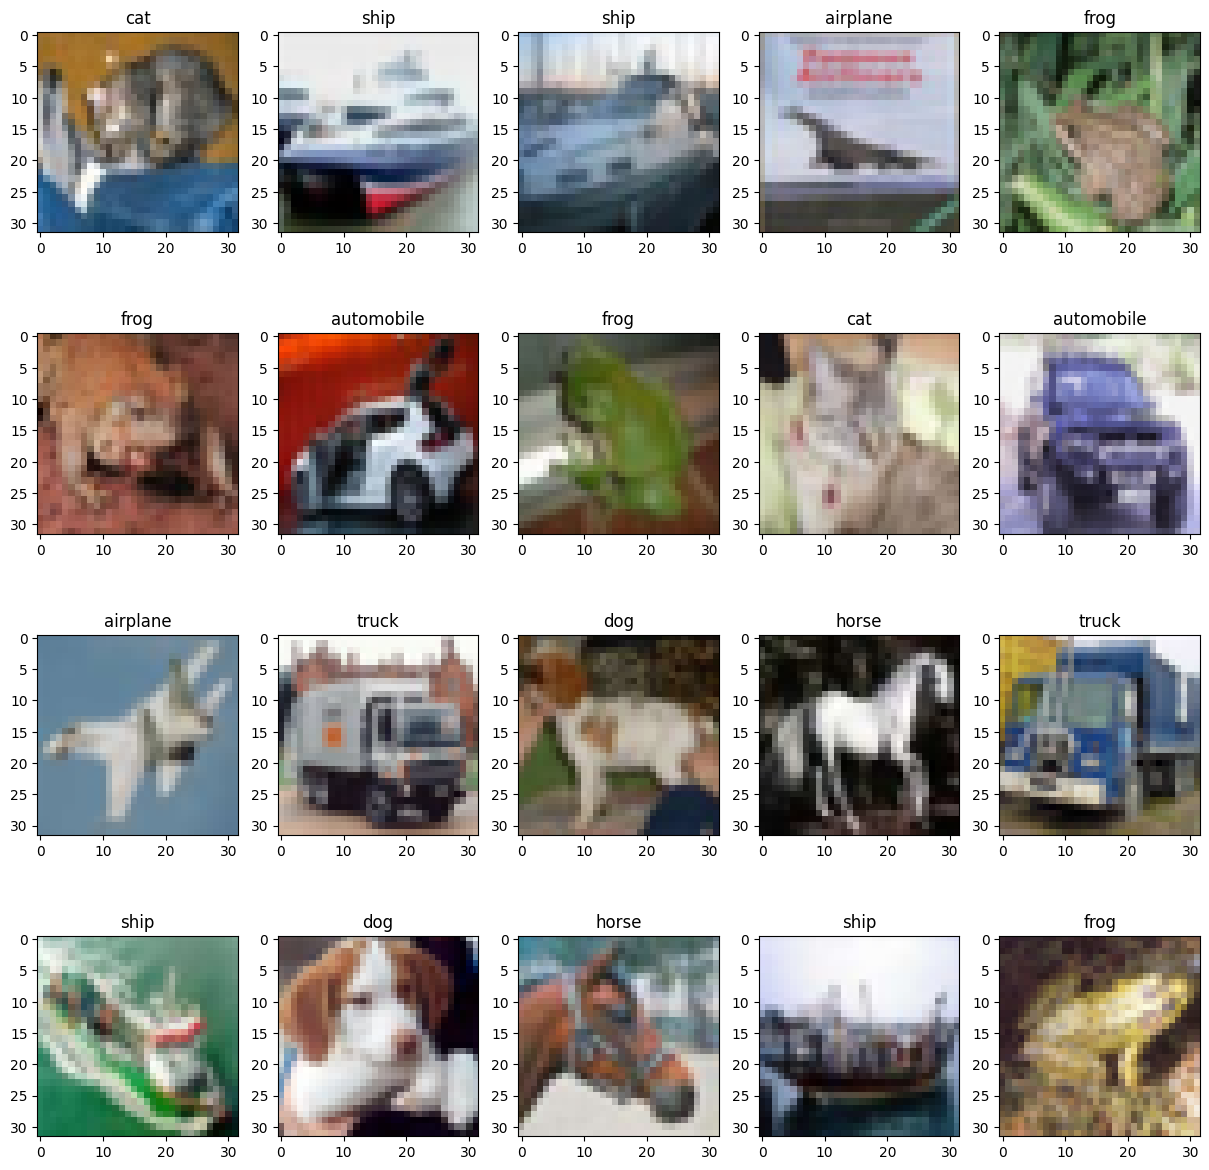

In [ ]:
plt.figure(figsize = (15,15))
for i in range(20):
  plt.subplot(4,5, i+1)
  plt.title(name_list[y_test[i][0]])
  plt.imshow(X_test[i])

In [15]:
def define_model():
  model = Sequential()

  model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(32, 32, 3)))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Dropout(0.2))


  model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.2))


  model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Dropout(0.2))

  model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Dropout(0.3))
  model.add(Conv2D(128, kernel_size=(3,3), padding='same', activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(MaxPool2D())
  model.add(Dropout(0.3))

  model.add(Flatten())

  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(BatchNormalization())
  model.add(Dropout(0.5))
  model.add(Dense(10, activation='softmax'))

  opt = optimizers.Adam()
  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)

  return model

In [16]:
acc_per_fold = []
loss_per_fold = []
inputs = np.vstack((X_train, X_test))
targets = np.vstack((Y_train, Y_test))
kfold = KFold(n_splits=6, shuffle=False)
current_fold_num = 1
for train_index, test_index in kfold.split(inputs):
  print("TRAIN:", train_index, "TEST:", test_index)
  X, XT = inputs[train_index], inputs[test_index]
  Y, YT = targets[train_index], targets[test_index]
  #base model
  base_model = define_model()
  # early stop
  es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)
  history = base_model.fit(X, Y, epochs=20, batch_size=64, validation_data=(XT, YT), callbacks=[es])
  scores = base_model.evaluate(XT, YT)
  print(f"Scores for {current_fold_num}: ", scores[1]*100)
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])
  current_fold_num +=1

TRAIN: [10000 10001 10002 ... 59997 59998 59999] TEST: [   0    1    2 ... 9997 9998 9999]
Epoch 1/20
782/782 [==============================] - 23s 15ms/step - loss: 1.7999 - accuracy: 0.3797 - val_loss: 1.4066 - val_accuracy: 0.4842
Epoch 2/20
782/782 [==============================] - 10s 13ms/step - loss: 1.2769 - accuracy: 0.5376 - val_loss: 1.1741 - val_accuracy: 0.5732
Epoch 3/20
782/782 [==============================] - 11s 14ms/step - loss: 1.0825 - accuracy: 0.6145 - val_loss: 1.0737 - val_accuracy: 0.6285
Epoch 4/20
782/782 [==============================] - 12s 15ms/step - loss: 0.9520 - accuracy: 0.6651 - val_loss: 0.8073 - val_accuracy: 0.7117
Epoch 5/20
782/782 [==============================] - 11s 14ms/step - loss: 0.8510 - accuracy: 0.7029 - val_loss: 0.7742 - val_accuracy: 0.7225
Epoch 6/20
782/782 [==============================] - 14s 18ms/step - loss: 0.7827 - accuracy: 0.7303 - val_loss: 0.6485 - val_accuracy: 0.7702
Epoch 7/20
782/782 [=========================

<ipython-input-17-8cd40f918f9a>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


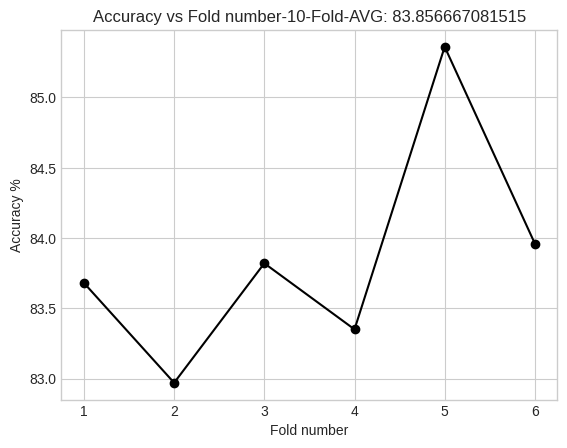

<ipython-input-17-8cd40f918f9a>:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


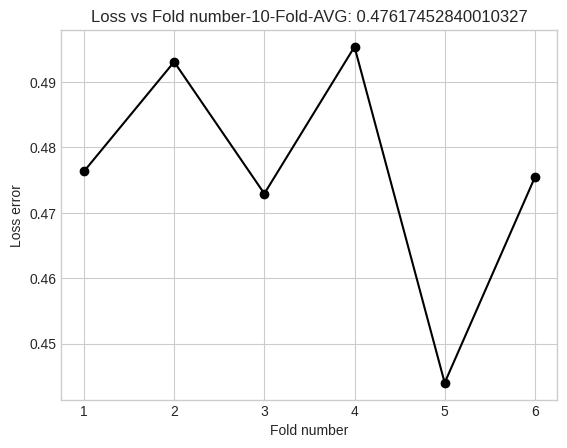

In [17]:
x = np.linspace(1, 6, 6)
plt.style.use('seaborn-whitegrid')
plt.plot(x, acc_per_fold, '-ok')
plt.xlabel("Fold number")
plt.ylabel("Accuracy %")
plt.title(f"Accuracy vs Fold number-10-Fold-AVG: {np.average(acc_per_fold)}")
plt.show()

plt.style.use('seaborn-whitegrid')
plt.plot(x, loss_per_fold, '-ok')
plt.xlabel("Fold number")
plt.ylabel("Loss error")
plt.title(f"Loss vs Fold number-10-Fold-AVG: {np.average(loss_per_fold)}")
plt.show()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_72 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_84 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_73 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_85 (Ba  (None, 32, 32, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_48 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                     

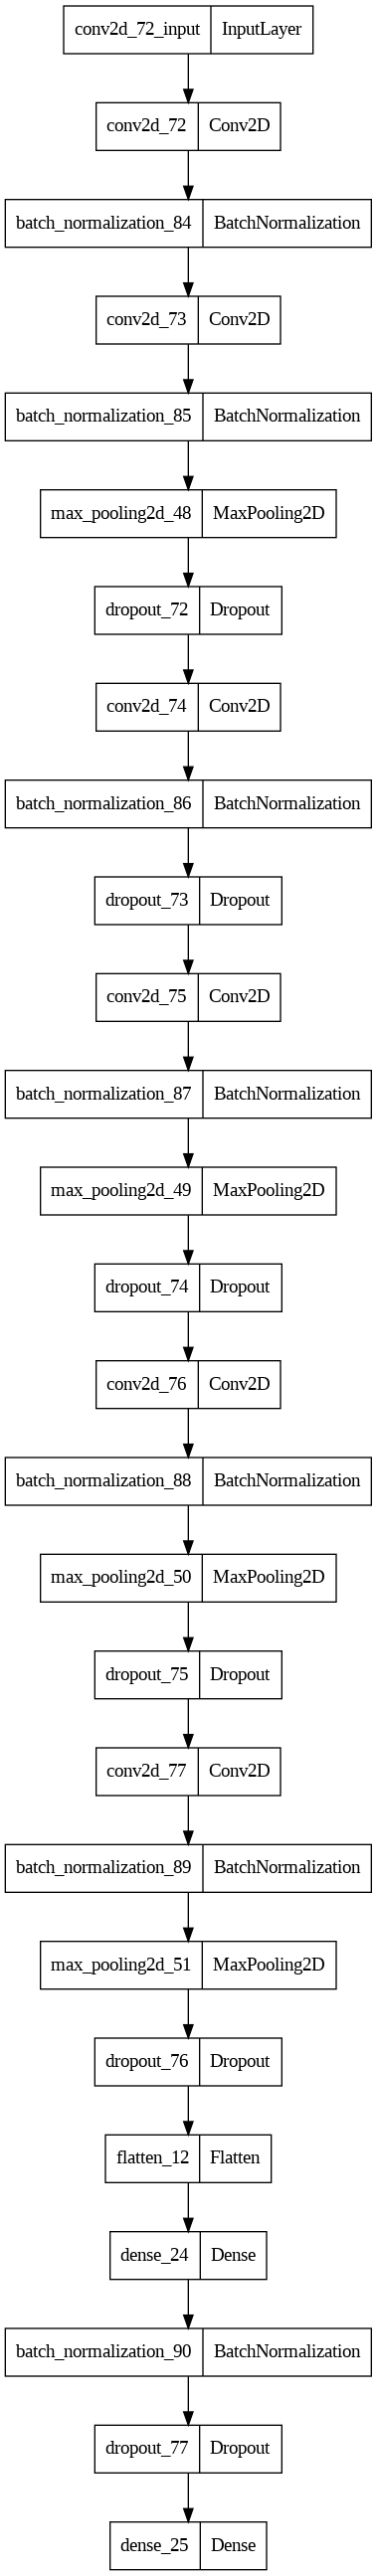

In [18]:
# create base model
base_model = define_model()
base_model.summary()
plot_model(base_model)

In [19]:
# early stop
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', patience=10)
# training model
history = base_model.fit(X_train, Y_train, epochs=100, batch_size=64, validation_data=(X_test, Y_test), callbacks=[es])

Epoch 1/100
782/782 [==============================] - 16s 14ms/step - loss: 1.8015 - accuracy: 0.3785 - val_loss: 1.6185 - val_accuracy: 0.4413
Epoch 2/100
782/782 [==============================] - 11s 14ms/step - loss: 1.2447 - accuracy: 0.5506 - val_loss: 1.1322 - val_accuracy: 0.5929
Epoch 3/100
782/782 [==============================] - 11s 14ms/step - loss: 1.0439 - accuracy: 0.6298 - val_loss: 0.9874 - val_accuracy: 0.6461
Epoch 4/100
782/782 [==============================] - 11s 14ms/step - loss: 0.9183 - accuracy: 0.6776 - val_loss: 0.7790 - val_accuracy: 0.7255
Epoch 5/100
782/782 [==============================] - 11s 14ms/step - loss: 0.8302 - accuracy: 0.7089 - val_loss: 0.8139 - val_accuracy: 0.7187
Epoch 6/100
782/782 [==============================] - 10s 13ms/step - loss: 0.7688 - accuracy: 0.7346 - val_loss: 0.7472 - val_accuracy: 0.7360
Epoch 7/100
782/782 [==============================] - 11s 14ms/step - loss: 0.7071 - accuracy: 0.7550 - val_loss: 0.6070 - val_ac

In [20]:
result = base_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4382 - accuracy: 0.8526


In [21]:
base_model.save('/content/drive/MyDrive/base_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


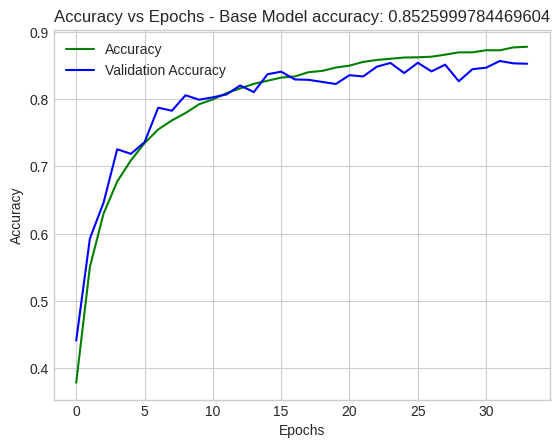

In [22]:
# fig = plt.figure()
plt.plot(history.history['accuracy'], 'g', label='Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title(f"Accuracy vs Epochs - Base Model accuracy: {result[1]}")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig("/content/drive/MyDrive/base-model")
plt.show()